# Data Cleaning and EDA on Airbnb Dataset with Python Pandas and Seaborn

Author: Soner Yıldırım

Article from [towardsdatascience](https://towardsdatascience.com/data-cleaning-and-eda-on-airbnb-dataset-with-python-pandas-and-seaborn-7c276116b650).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

# Data analysis

In [3]:
listings = pd.read_csv('datasets/listings.csv')
print(listings.shape)

(16920, 75)


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,...,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,...,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,...,4.99,4.70,4.89,NaN,f,1,1,0,0,2.15
3,18674,https://www.airbnb.com/rooms/18674,20220910194401,2022-09-11,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.79,4.79,4.34,HUTB-002062,t,38,38,0,0,0.27
4,553559871868002337,https://www.airbnb.com/rooms/553559871868002337,20220910194401,2022-09-10,city scrape,"8 lacus, VICTORIA",8 apartaments que pretenen recordar la importà...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,442972056,...,4.50,4.40,4.80,HUTB-009880,t,8,8,0,0,1.52


In [7]:
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].dtypes

price                   object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [8]:
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

,price,host_response_rate,host_acceptance_rate
0,$59.00,100%,100%
1,$110.00,100%,100%
2,$86.00,100%,97%
3,$180.00,98%,93%
4,$110.00,100%,100%


In [9]:
listings['price'] = listings['price'].str[1:].str.replace(',','').astype('float')
listings["host_response_rate"] = listings["host_response_rate"].str[:-1].astype("float") / 100
listings["host_acceptance_rate"] = listings["host_acceptance_rate"].str[:-1].astype("float") / 100

In [10]:
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

,price,host_response_rate,host_acceptance_rate
0,59.0,1.00,1.00
1,110.0,1.00,1.00
2,86.0,1.00,0.97
3,180.0,0.98,0.93
4,110.0,1.00,1.00


In [11]:
listings[["bathrooms_text"]].head()

,bathrooms_text
0,1 shared bath
1,1 bath
2,1 bath
3,2 baths
4,1 bath


In [12]:
listings["bathroom_qty"] = listings["bathrooms_text"].str.split(" ", expand=True)[0]
listings["bathroom_type"] = listings["bathrooms_text"].str.split(" ", expand=True)[1]

In [13]:
listings[
    ["bathrooms_text","bathroom_qty","bathroom_type"]
].head()

,bathrooms_text,bathroom_qty,bathroom_type
0,1 shared bath,1,shared
1,1 bath,1,bath
2,1 bath,1,bath
3,2 baths,2,baths
4,1 bath,1,bath


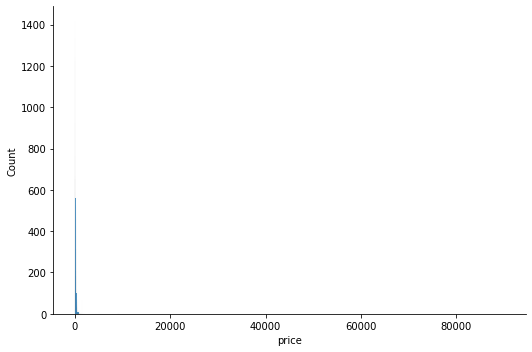

In [20]:
sns.displot(data=listings, x="price", kind="hist", aspect=1.5)

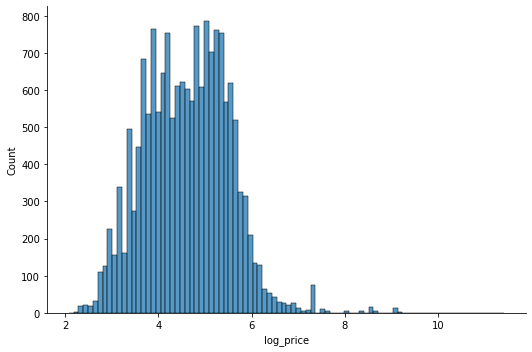

In [29]:
listings = listings[listings.price!=0]
listings.loc[:,"log_price"] = np.log(listings.loc[:,"price"])
sns.displot(data=listings, x="log_price", kind="hist", aspect=1.5)

In [41]:
listings.groupby(
    ["host_identity_verified"],
    as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,host_identity_verified,avg_price,qty
0,f,170.477080,2356
1,t,173.337958,14561


In [42]:
listings.groupby(
    ["host_response_time"], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)

,host_response_time,avg_price,qty
0,a few days or more,288.022901,393
1,within a day,198.139592,1225
2,within an hour,170.563783,10034
3,within a few hours,144.893240,2426


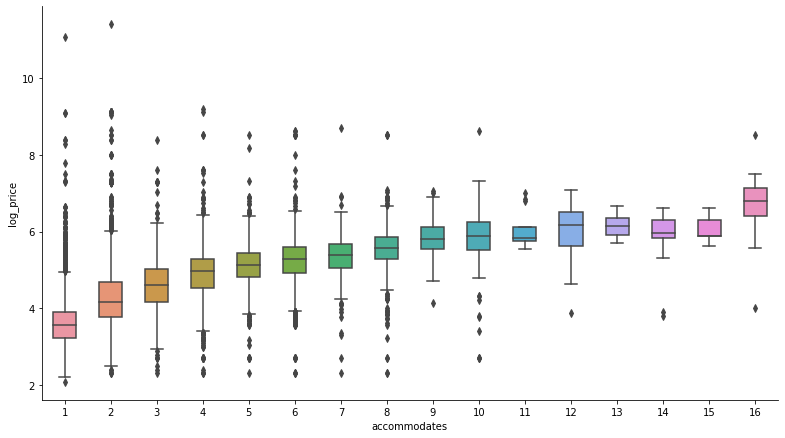

In [43]:
sns.catplot(
    data=listings,
    x='accommodates', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [44]:
listings[[
    'availability_30', 'availability_60',
    'availability_90', 'availability_365',
    'log_price'
]].corr()

,availability_30,availability_60,availability_90,availability_365,log_price
availability_30,1.000000,0.903975,0.803245,0.415334,0.380470
availability_60,0.903975,1.000000,0.951351,0.506266,0.419906
availability_90,0.803245,0.951351,1.000000,0.590606,0.452610
availability_365,0.415334,0.506266,0.590606,1.000000,0.284108
log_price,0.380470,0.419906,0.452610,0.284108,1.000000


In [45]:
listings.groupby(
    ['instant_bookable'], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,instant_bookable,avg_price,qty
0,f,145.820833,8160
1,t,198.175591,8759


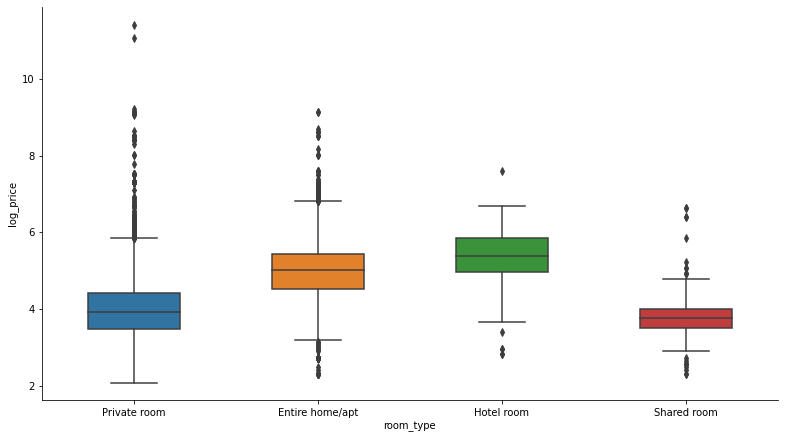

In [46]:
sns.catplot(
    data=listings,
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [48]:
listings.amenities

0        ["Ethernet connection", "Hangers", "Hot water ...
1        ["Fire extinguisher", "Stove", "Air conditioni...
2        ["Stove", "Cooking basics", "Security cameras ...
3        ["Kitchen", "Hot water", "Host greets you", "L...
4        ["Kitchen", "Long term stays allowed", "Fire e...
                               ...                        
16915    ["Fire extinguisher", "Stove", "Air conditioni...
16916    ["Fire extinguisher", "Stove", "Air conditioni...
16917    ["Fire extinguisher", "Stove", "Air conditioni...
16918    ["Cable TV", "Fire extinguisher", "Cooking bas...
16919    ["Cable TV", "Fire extinguisher", "Mini fridge...
Name: amenities, Length: 16919, dtype: object

In [47]:
listings.loc[:,"has_coffee_maker"] = ['coffee maker' in row.lower() for row in listings.amenities]

In [50]:
listings.has_coffee_maker.value_counts()

True     9845
False    7074
Name: has_coffee_maker, dtype: int64

In [51]:
listings.groupby(
    ["has_coffee_maker"]
).agg(
    avg_price = ("price", "mean")
)

,avg_price
has_coffee_maker,
False,167.090472
True,177.117318


In [52]:
listings.groupby(
    ["neighbourhood_group_cleansed"], as_index=False
).agg(
    avg_price = ("price", "mean"),
    qty = ("price", "count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)

,neighbourhood_group_cleansed,avg_price,qty
0,Horta-Guinardó,252.250569,439
1,Les Corts,229.988079,755
2,Eixample,212.082045,5692
3,Sarrià-Sant Gervasi,170.245517,725
4,Sants-Montjuïc,155.918453,2146
5,Sant Martí,150.015244,1640
6,Ciutat Vella,137.098508,3553
7,Gràcia,134.326761,1420
8,Sant Andreu,110.316667,360
9,Nou Barris,66.375661,189


In [53]:
listings[listings.neighbourhood_group_cleansed=="Les Corts"].groupby(
    ["neighbourhood_cleansed"]
).agg(
    avg_price = ("price", "mean"),
    qty = ("price", "count")
).sort_values(
    by="avg_price", ascending=False
)

,avg_price,qty
neighbourhood_cleansed,,
la Maternitat i Sant Ramon,247.421756,524
les Corts,207.794444,180
Pedralbes,129.196078,51
